<a href="https://colab.research.google.com/github/Dhathri19/SIH-Project/blob/main/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv.python

In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [ ]:
!pip install -U pillow

In [ ]:
from logging import Filter
#Importing libraries
import cv2
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

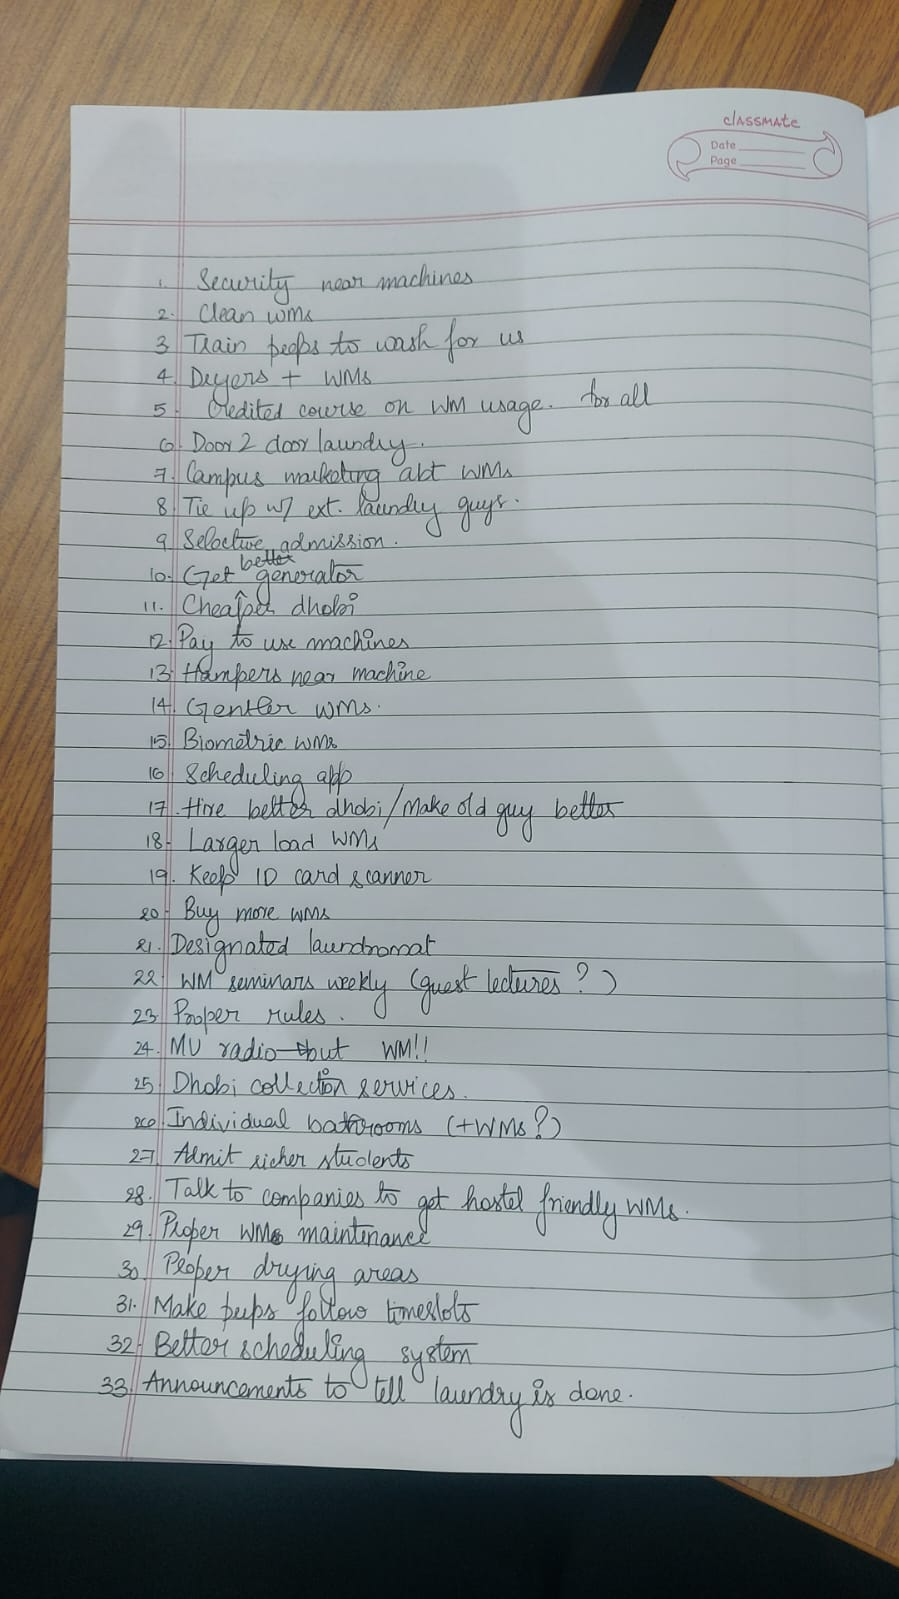

In [ ]:
img = cv2.imread('Tanvi.jpeg', cv2.IMREAD_UNCHANGED)
#plt.imshow(img)
cv2_imshow(img)

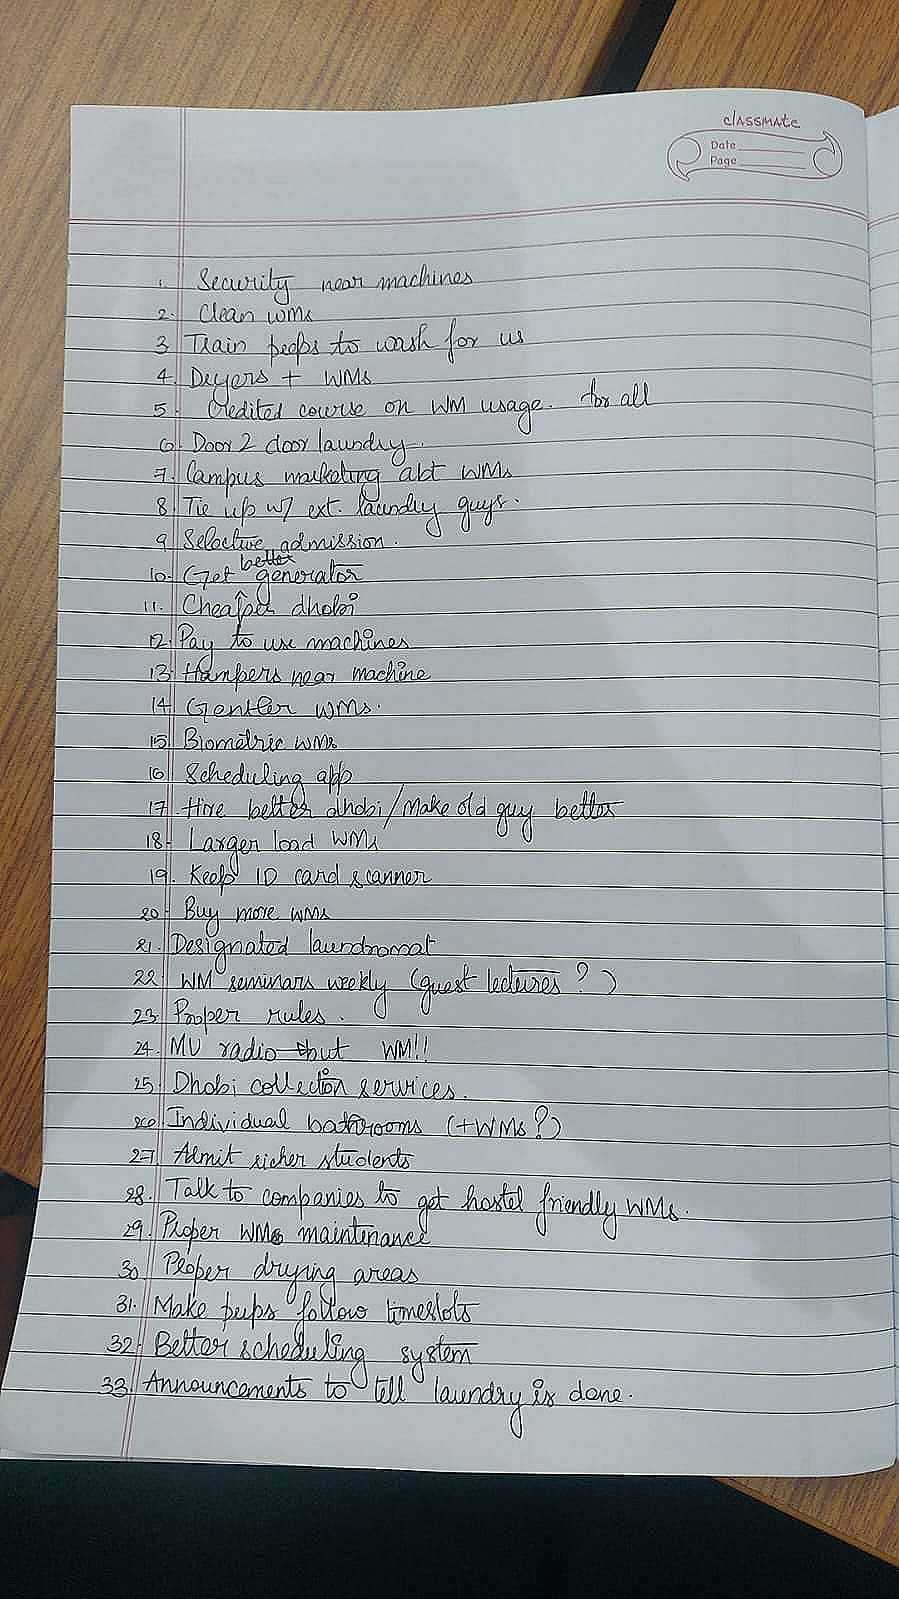

True

In [ ]:
#Sharpening using open cv
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
cv2_imshow(image_sharp)
cv2.imwrite('Tanvi_sharp.jpeg', image_sharp)

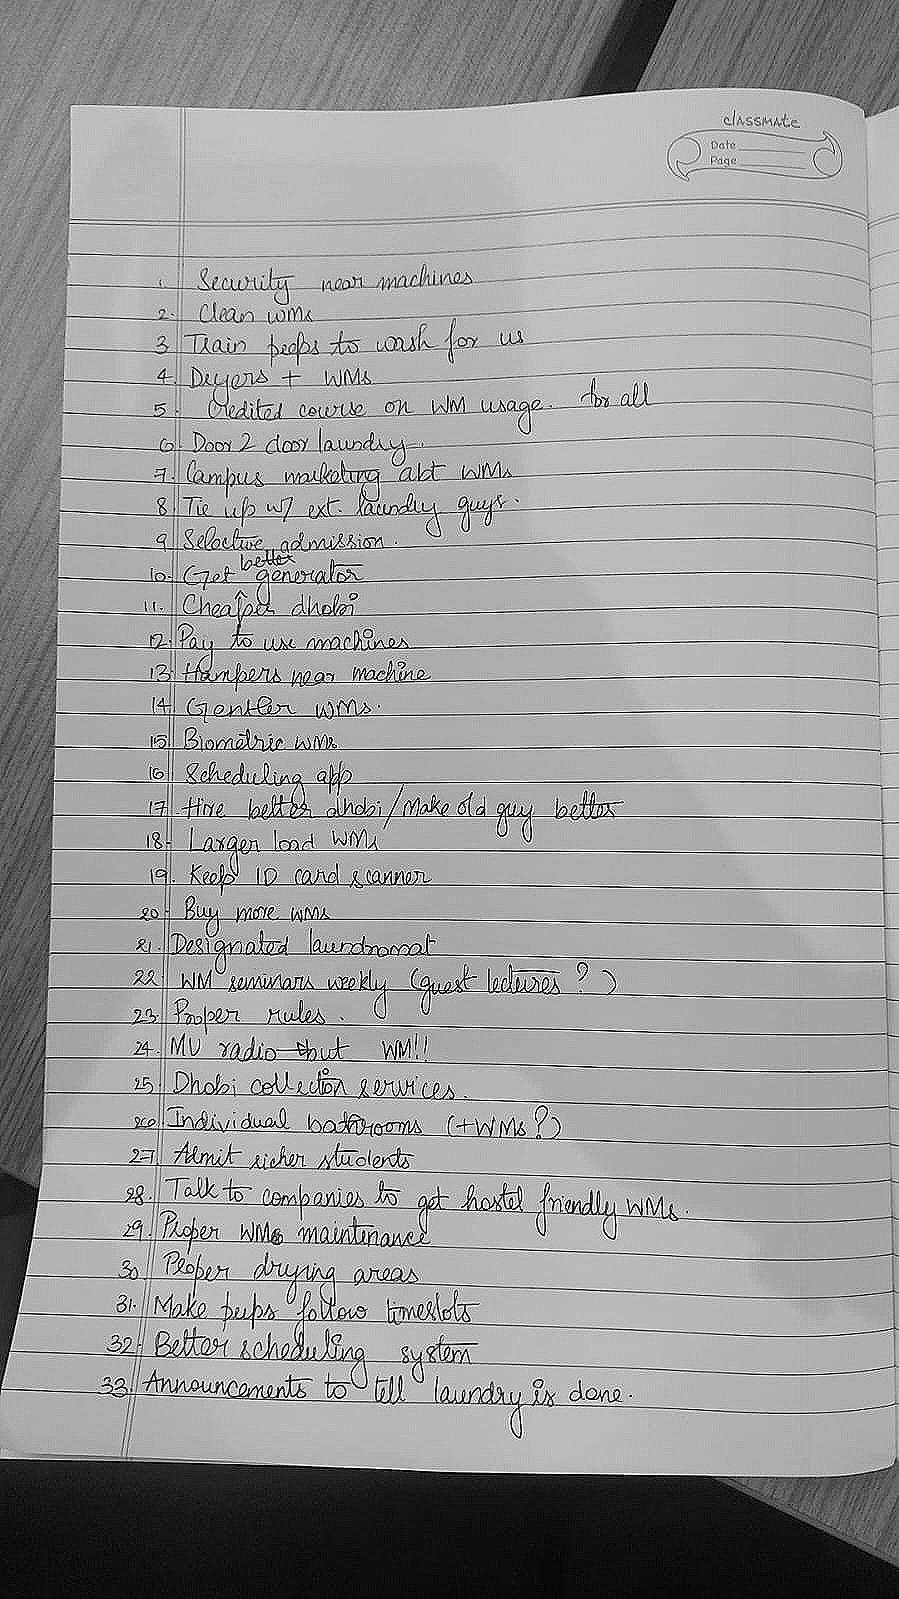

In [ ]:
#Using opencv
grayscale = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

In [ ]:
#Binarization of image
im_gray = np.array(Image.open('Tanvi_sharp.jpeg').convert('L'))
print(type(im_gray))

<class 'numpy.ndarray'>


In [ ]:
print(im_gray)

[[115 123 132 ... 115 107  99]
 [125 129 130 ... 108 102  98]
 [129 130 134 ... 106 103 100]
 ...
 [ 10  10   9 ...  11  10   8]
 [ 10  10   9 ...  14  12  10]
 [ 10   9   9 ...  10   9   9]]


In [ ]:
thresh = 128

im_bool = im_gray > thresh
print(im_bool)

[[False False  True ... False False False]
 [False  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
maxval = 255

im_bin = (im_gray > thresh) * maxval
print(im_bin)

[[  0   0 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
Image.fromarray(np.uint8(im_bin)).save('Test_binarise.jpeg')

In [ ]:
image = Image.open('Test_binarise.jpeg')
new_image = image.resize((400, 400))
new_image.save('Test_400.jpeg')

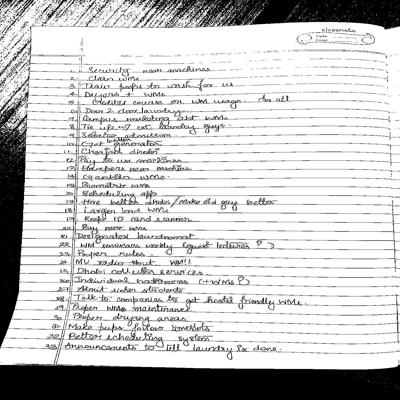

In [ ]:
img = cv2.imread('Test_400.jpeg', cv2.IMREAD_UNCHANGED)
#plt.imshow(img)
cv2_imshow(img)

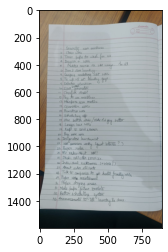

In [ ]:
handwrit = cv2.imread("Tanvi.jpeg")
handwrit = cv2.cvtColor(handwrit, cv2.COLOR_BGR2RGB)
plt.imshow(handwrit)

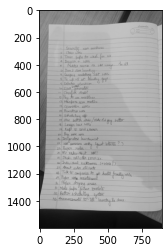

In [ ]:
handwrit = cv2.cvtColor(handwrit, cv2.COLOR_RGB2GRAY)
plt.imshow(handwrit, cmap='gray', vmin=0, vmax=255)

In [ ]:
average = 0
for row in handwrit:
    for pixel in row:
        average+=pixel
    
average/=(len(handwrit)*len(handwrit[0]))
average

154.14260372688437

True

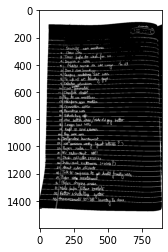

In [ ]:
handwrit2 = cv2.threshold(handwrit, average, 255, cv2.THRESH_BINARY)[1]
plt.imshow(handwrit2, cmap="binary", vmin=0, vmax=255)
# handwrit2
cv2.imwrite('binaryhand.jpg', handwrit2)

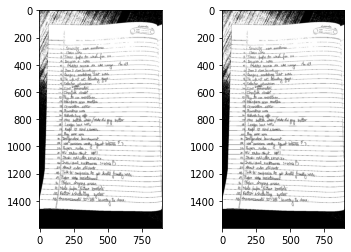

In [ ]:
img = cv2.imread('Test_binarise.jpeg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)
cv2.imwrite('binaryhand21.jpeg', dst)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

In [ ]:
image = Image.open(r"binaryhand21.jpeg")
image = image.convert("L")
image = image.filter(ImageFilter.FIND_EDGES)
image.save(r"Edge_Sample.jpeg")

In [ ]:
!pip install matplotlib opencv-python 

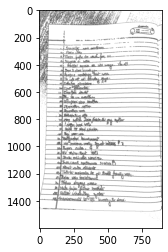

In [ ]:
image = cv2.imread("Edge_Sample.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap="gray")
plt.show()

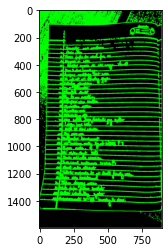

In [ ]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
cv2.imwrite('binaryhand_Tanvi.jpg', image)
# show the image with the drawn contours
plt.imshow(image)
plt.show()